# HSLU FS18 - IPCV: Bürgler Exercise III - Compression
##### Student: Adrian Kauz
***

## Imports

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Aufgabe 1
A: Zeige dass die Inverse der Matrix $C$ gleich der transponierten Matrix $C$ ist.  
\begin{equation*}
C^{-1} = C^T
\end{equation*}

In [2]:
N = 1000
C = np.zeros(shape = (N, N))

for i in range(N):
    for j in range(N):
        C[i][j] = np.cos((2 * j + 1) * i * np.pi / (2 * N))

C[0,:] = C[0,:] * np.sqrt(1 / N)
C[1:,:] = C[1:,:] * np.sqrt(2 / N)
        
#print(C)

In [3]:
# Wenn beide Matrixen identisch sind, so sollte eine Substraction von der Einten mit der Anderen 0 ergeben.
# Da wir hier es hier mit Fliesskommazahlen zu tun haben und Rundungsfehler nicht verhindert werden können,
# bekommen wir ein Resultat nahe Null.
np.max(abs(np.linalg.inv(C) - C.T))

2.8738296464769775e-14

B: Zeige nun dass gilt:  
\begin{equation*}
CC^{T} = C^{T}C = 1
\end{equation*}

In [4]:
np.max(abs(C @ C.T))

1.000000000000032

In [5]:
np.max(abs(C.T @ C))

1.0000000000000369

<hr>

 # Aufgabe 2
Wenn Sie die Aufgabe 1 verstanden haben, können Sie sofort sagen, wie man den Vektor $x$ aus dem Vektor $y$
berechnet! Wie sieht die entsprechende Gleichung in möglichst einfacher Form aus? (Matrixform!).

Wenn...
\begin{equation*}
\vec{y} = C * \vec{x}
\end{equation*}  
dann...
\begin{equation*}
\vec{x} = C^{-1} * \vec{y}
\end{equation*}  
oder...
\begin{equation*}
\vec{x} = C^{T} * \vec{y}
\end{equation*}  
<hr>

 # Aufgabe 3
**3.1** Erzeugen Sie ein Graustufenbild mit 8x8 Pixel, in welches Sie einen Kreis mit einem Radius $R$ von 2 Pixel
zeichnen. Dabei soll nur die Randlinie des Kreises schwarz sein, der Rest des Bildes weiss. Erzeugen Sie
ein Bild der Matrix (mit matrixplot(..) ).

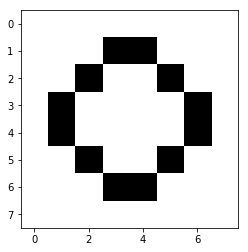

In [6]:
image = np.matrix([[255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255,   0,   0, 255, 255, 255],
                   [255, 255,   0, 255, 255,   0, 255, 255],
                   [255,   0, 255, 255, 255, 255,   0, 255],
                   [255,   0, 255, 255, 255, 255,   0, 255],
                   [255, 255,   0, 255, 255,   0, 255, 255],
                   [255, 255, 255,   0,   0, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255]])

plt.imshow(image, cmap="gray")

**3.2** Führen Sie die Kosinus Transformation durch und komprimieren Sie das Bild, indem Sie nur 90, 70, 50 oder
30 Prozent aller Koeffizienten berücksichtigen.

In [7]:
# Generiere zuerst DCT-Matrix
N = 8
C = np.zeros(shape = (N, N))

for i in range(N):
    for j in range(N):
        C[i][j] = np.cos((2 * j + 1) * i * np.pi / (2 * N))

C[0,:] = C[0,:] * np.sqrt(1 / N)
C[1:,:] = C[1:,:] * np.sqrt(2 / N)

# Generiere DCT-Image (Aus den Slides)
dct_image = np.dot(np.dot(C, image), C.T)

# Komprimiere
ratio = 0.5
size = N * N

compressed_dct_image = dct_image.copy()

# Starte mit 0 setzen rechts unten. So werden zuerst die hohen Frequenzen eliminiert
for x in range(N):
    for y in range(N):
        if (size * ratio) < ((x + 1) * (y + 1)):
            compressed_dct_image[x, y] = 0

print(compressed_dct_image)

[[ 1.65750000e+03  5.68434189e-14  1.66586778e+02  1.13686838e-13
   1.27500000e+02  4.83169060e-13  6.90025028e+01 -2.55795385e-13]
 [ 1.30631693e-13 -3.15544362e-30 -2.85108361e-14  0.00000000e+00
   5.02429587e-14  3.94430453e-29 -4.25730116e-14 -2.68212708e-29]
 [ 1.66586778e+02 -8.19172766e-16  1.42968344e+02  7.80802457e-14
  -3.04591784e+02  2.36853836e-14 -9.01561146e+01 -4.85262182e-14]
 [ 1.00485917e-13  6.31088724e-30  8.19603650e-14  3.15544362e-29
  -8.03887339e-14  3.31321580e-29 -1.21960601e-14 -2.20881053e-29]
 [ 1.27500000e+02  4.29056217e-14 -3.04591784e+02 -9.70810222e-14
   1.27500000e+02  3.47374363e-14  0.00000000e+00  0.00000000e+00]
 [ 5.02429587e-13  5.04870979e-29  3.39490948e-14  3.78653235e-29
   4.01943669e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.90025028e+01 -3.67558959e-14 -9.01561146e+01 -2.14354649e-14
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.11020426e-13 -1.26217745e-29 -3.30160371e-14 -1.89326617e-29
   

**3.3** Führen Sie die Kosinus Transformation durch und komprimieren Sie das Bild, indem Sie nur 90, 70, 50 oder
30 Prozent aller Koeffizienten berücksichtigen.

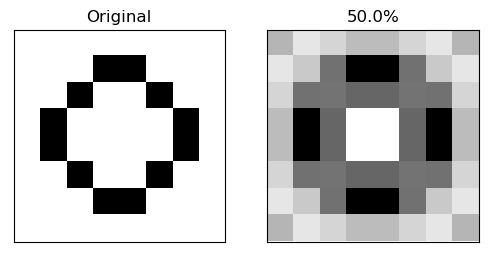

In [8]:
# Rekonstruiere Image aus obiger erhaltener komprimierter DCT-Matrix
decoded_image = np.dot(np.dot(C.T, compressed_dct_image), C)

plt.rcParams['figure.dpi']= 100
plt.subplot(1, 2, 1), plt.imshow(image), plt.set_cmap('gray'), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(decoded_image), plt.set_cmap('gray'), plt.title(str(ratio * 100) + '%'), plt.xticks([]), plt.yticks([])
plt.show()

Wenn man die Augen zusammenkneift kann man den Kreis bei starker Kompression wieder sehen.
***

# Aufgabe 4

**4.1** Erzeugen Sie ein frei gewähltes Bild als Graustufen-Matrix der Grösse 16x16.  
**4.2** Führen Sie die Kosinus Transformation durch, und unterdrücken Sie einige der hohen Frequenzen.  
**4.3** Führen Sie die Rücktransformation durch. Zeichnen Sie die so entstehenden Bilder mit matrixplot(..)

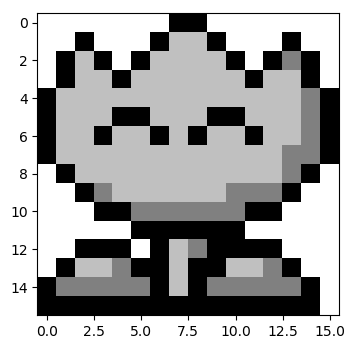

In [9]:
image2 = np.matrix([[255, 255, 255, 255, 255, 255, 255,   0,   0, 255, 255, 255, 255, 255, 255, 255,],
                    [255, 255,   0, 255, 255, 255,   0, 192, 192,   0, 255, 255, 255,   0, 255, 255,],
                    [255,   0, 192,   0, 255,   0, 192, 192, 192, 192,   0, 255,   0, 128,   0, 255,],
                    [255,   0, 192, 192,   0, 192, 192, 192, 192, 192, 192,   0, 192, 192,   0, 255,],
                    [  0, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 128,   0,],
                    [  0, 192, 192, 192,   0,   0, 192, 192, 192,   0,   0, 192, 192, 192, 128,   0,],
                    [  0, 192, 192,   0, 192, 192,   0, 192,   0, 192, 192,   0, 192, 192, 128,   0,],
                    [  0, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 128, 128,   0,],
                    [255,   0, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 128,   0, 255,],
                    [255, 255,   0, 128, 192, 192, 192, 192, 192, 192, 128, 128, 128,   0, 255, 255,],
                    [255, 255, 255,   0,   0, 128, 128, 128, 128, 128, 128,   0,   0, 255, 255, 255,],
                    [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,],
                    [255, 255,   0,   0,   0, 255,   0, 192, 128,   0,   0,   0,   0, 255, 255, 255,],
                    [255,   0, 192, 192, 128,   0,   0, 192,   0,   0, 192, 192, 128,   0, 255, 255,],
                    [  0, 128, 128, 128, 128, 128,   0, 192,   0, 128, 128, 128, 128, 128,   0, 255,],
                    [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,]])

plt.imshow(image2, cmap="gray")

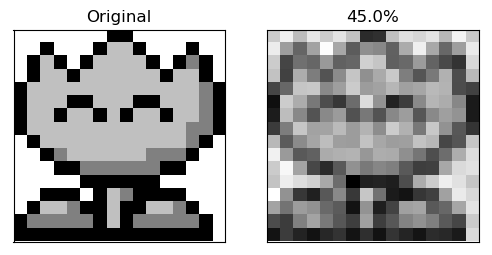

In [10]:
# Generiere zuerst DCT-Matrix
N = 16
C = np.zeros(shape = (N, N))

for i in range(N):
    for j in range(N):
        C[i][j] = np.cos((2 * j + 1) * i * np.pi / (2 * N))

C[0,:] = C[0,:] * np.sqrt(1 / N)
C[1:,:] = C[1:,:] * np.sqrt(2 / N)

# Generiere DCT-Image (Aus den Slides)
dct_image = np.dot(np.dot(C, image2), C.T)

# Komprimiere
ratio = 0.45
size = N * N

compressed_dct_image2 = dct_image.copy()

# Starte mit 0 setzen rechts unten. So werden zuerst die hohen Frequenzen eliminiert
for x in range(N):
    for y in range(N):
        if (size * ratio) < ((x + 1) * (y + 1)):
            compressed_dct_image2[x, y] = 0

# Rekonstruiere Image aus obiger erhaltener komprimierter DCT-Matrix
decoded_image2 = np.dot(np.dot(C.T, compressed_dct_image2), C)

plt.rcParams['figure.dpi']= 100
plt.subplot(1, 2, 1), plt.imshow(image2), plt.set_cmap('gray'), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(decoded_image2), plt.set_cmap('gray'), plt.title(str(ratio * 100) + '%'), plt.xticks([]), plt.yticks([])
plt.show()